# TP images: corrélation et recherche de motif
## Données numériques - 2022-23
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [5]:
from skimage import io
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import math

In [6]:
%matplotlib inline

## Cross Correlation

In [7]:
#voici les imagettes utilisées dans les slides
imageTest = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifTest = np.array([[4,5,6],[4,5,8],[40,50,80]])

[[  4   5   6   7   8]
 [  4   5   8   9  10]
 [ 40  50  80  90 100]
 [ 43  48  88  92   5]]
[[ 4  5  6]
 [ 4  5  8]
 [40 50 80]]


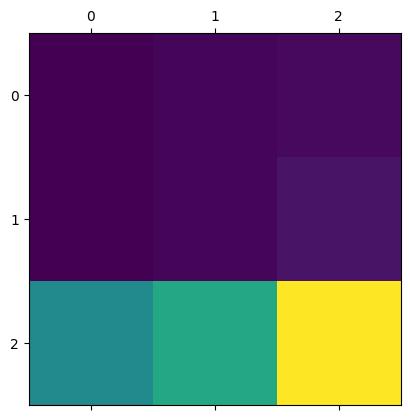

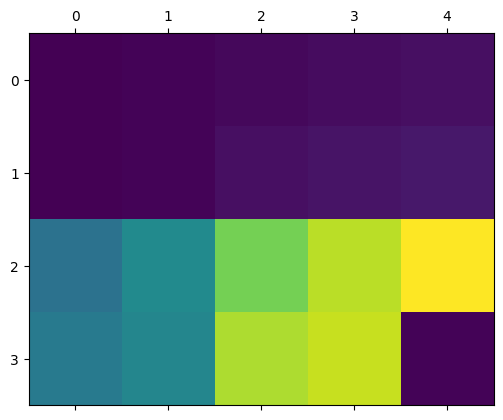

In [8]:
print(imageTest)
print(motifTest)
plt.matshow(motifTest)
plt.matshow(imageTest)

**Question 1:** Ecrire le code de la fonction *correlationWithoutNorm* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation sans aucune normalisation.

In [17]:
def crossCorrelationWithoutNorm(img, motif):
    (h,w) = img.shape[:2]
    (hMotif,wMotif) = motif.shape[:2]
    res = np.zeros(img.shape)
    for i in range(hMotif//2, h-hMotif//2):
        for j in range(wMotif//2, w-wMotif//2):
            i_start = i - hMotif//2
            i_end = i + hMotif//2 + 1
            j_start = j - wMotif//2
            j_end = j + wMotif//2 + 1
            res[i][j] = np.sum(img[i_start:i_end, j_start:j_end] * motif)
    return res



[[    0.     0.     0.     0.     0.]
 [    0. 10682. 13424. 15964.     0.]
 [    0. 12299. 15114. 10227.     0.]
 [    0.     0.     0.     0.     0.]]


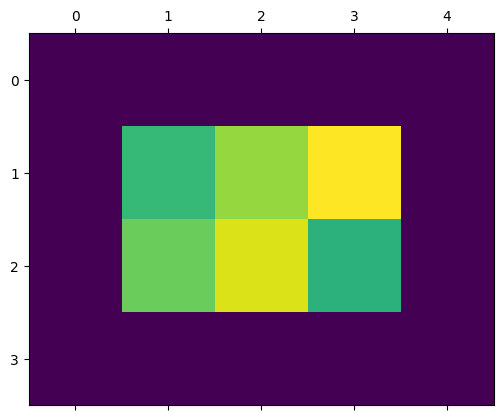

In [30]:
#Test crossCorrelationWithoutNorm
imgSlide = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifSlide = np.array([[4,5,6],[4,5,8],[40,50,80]])

test = crossCorrelationWithoutNorm(imgSlide,motifSlide)
print(test)
plt.matshow(test)

**Question 2:** Ecrire le code de la fonction *correlation* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation avec les normalisations vues en cours. Il pourra s'agir d'une implémentation naïve.

In [99]:
def crossCorrelation(img, motif):
    (h,w) = img.shape[:2]
    (hMotif,wMotif) = motif.shape[:2]
    res = np.zeros(img.shape)
    motif = motif-np.mean(motif)
    stdMotif = math.sqrt(np.mean(motif*motif))
    if stdMotif == 0 :
        return res
    motif /= stdMotif
    for i in range(hMotif//2, h-hMotif//2):
        for j in range(wMotif//2, w-wMotif//2):
            i_start = i - hMotif//2
            i_end = i + hMotif - hMotif//2
            j_start = j - wMotif//2
            j_end = j + wMotif - wMotif//2
            meanCurrent = np.mean(img[i_start:i_end, j_start:j_end])
            stdCurrent = np.std(img[i_start:i_end, j_start:j_end])
            if stdCurrent == 0:
                res[i][j] = 0
            else:
                res[i][j] = np.sum((img[i_start:i_end, j_start:j_end] - meanCurrent) * motif) / stdCurrent
    res /= hMotif * wMotif
    return res

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.97916391  0.96322644  0.        ]
 [ 0.          0.59679602  0.55167288 -0.06123023  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


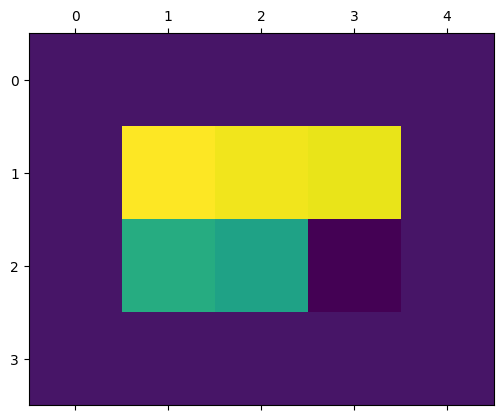

In [100]:
#Test crossCorrelation
imgSlide = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifSlide = np.array([[4,5,6],[4,5,8],[40,50,80]])

test = crossCorrelation(imgSlide,motifSlide)
print(test)
plt.matshow(test)

**Question 3:** Tester la fonction précédente. Affichez les résultats. Améliorer éventuellement l'implémentation pour accélerer les calculs. Il sera possible et peut-être nécessaire de revenir à cette question plus tard (question 5).

Déjà optimisé à la question

Les tests sont déjà fait avant du coup :/

## logo dans image

**Question 4:** Choisissez une image qui comporte plusieurs instances d'un motif et conservez l'image et une copie du motif. Modifiez la cellule suivante en conséquence. Soit les images sont en niveaux de gris, soit il faudra les convertir.

In [101]:
#img = io.imread('./TD7/text.png')
#logo = io.imread('./TD7/letter-a.png')
img = io.imread('./TD7/plaqadmissions.jpg')
logo = io.imread('./TD7/logoPolytech.jpg')

In [102]:
# conversion en niveaux de gris
img = rgb2gray(img[:,:,0:3])
logo = rgb2gray(logo[:,:,0:3])

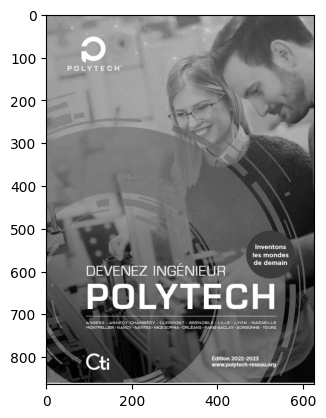

In [103]:
plt.imshow(img, cmap=plt.cm.gray)

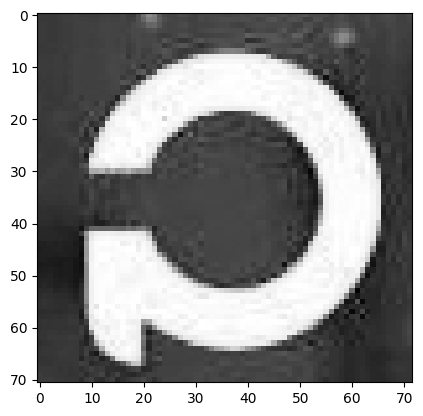

In [104]:
plt.imshow(logo, cmap=plt.cm.gray)

**Question 5:** Calculez la carte de corrélation et affichez la selon une carte de couleurs chaudes. Si les calculs sont trop longs, revenir à la question 3.

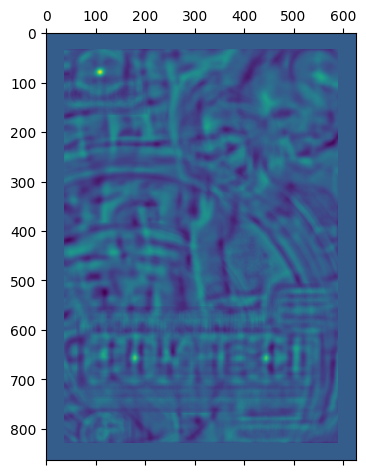

In [105]:
heatmap = crossCorrelation(img,logo)
plt.matshow(heatmap)

**Question 6:** Quel est le max? Où est-il situé?

In [106]:
print(np.max(heatmap))

0.9983663011950137


**Question 7:** Où sont les valeurs de forte corrélation? Il faut déterminer un seuil: 0.5? 0.8? 0.9? Ensuite, différentes possibilités de visualisation sont possibles:
- afficher la carte de corrélation seuillée en transparence sur l'image originale ou bien 
- entourer les zones concernées sur la carte de corrélation ou encore 
- sur l'image originale.

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_patch'